In [1]:
%cd /content

/content


In [2]:
!mkdir -p data/processed

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [16]:
customers = pd.read_csv("data/processed/customers_clean.csv")
products = pd.read_csv("data/processed/products_clean.csv")
transactions = pd.read_csv("data/processed/transactions_clean.csv")

In [17]:
customers.head(), products.head(), transactions.head()

(   customer_id             name  age              city signup_date
 0            1      Jean Harmon   62    North Saraside  2023-08-13
 1            2   Charles Ingram   59     Port Samantha  2025-07-20
 2            3     Cindy Barnes   63      Clarkchester  2025-09-04
 3            4   Suzanne Atkins   57  East Phillipview  2023-02-07
 4            5  Jonathan Farmer   38       Lake Angela  2024-07-12,
    product_id product_name     category  base_price
 0           1         Walk  Electronics      468.18
 1           2   Experience     Clothing      182.10
 2           3       Strong   Home Decor      270.94
 3           4         Trip     Clothing      267.52
 4           5      Outside  Electronics      410.02,
    transaction_id  customer_id  product_id  quantity   price  total_amount  \
 0               1          387         103         4  151.10        604.39   
 1               2           52         106         2  421.26        842.51   
 2               3          451    

In [18]:
print("Customers:", customers.shape)
print("Products:", products.shape)
print("Transactions:", transactions.shape)

transactions.describe()

Customers: (500, 5)
Products: (120, 4)
Transactions: (5000, 12)


,transaction_id,customer_id,product_id,quantity,price,total_amount,year,month,day,day_of_week,effective_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,250.674000,60.189400,2.515800,262.266964,661.462740,2023.0,6.52620,15.514200,2.984600,262.266937
std,1443.520003,145.191753,34.764644,1.112833,151.385338,509.934916,0.0,3.41714,8.823909,1.982813,151.385342
min,1.000000,1.000000,1.000000,1.000000,5.770000,5.960000,2023.0,1.00000,1.000000,0.000000,5.770000
25%,1250.750000,123.000000,30.000000,2.000000,134.712500,252.212500,2023.0,4.00000,8.000000,1.000000,134.715000
50%,2500.500000,254.000000,60.000000,3.000000,258.450000,511.785000,2023.0,7.00000,15.000000,3.000000,258.447500
75%,3750.250000,377.000000,91.000000,4.000000,391.502500,982.890000,2023.0,9.00000,23.000000,5.000000,391.503125
max,5000.000000,500.000000,120.000000,4.000000,592.870000,2313.940000,2023.0,12.00000,31.000000,6.000000,592.870000


In [19]:
monthly_sales = transactions.groupby("month")["total_amount"].sum().reset_index()
px.line(monthly_sales, x="month", y="total_amount", title="Monthly Sales Trend")

In [20]:
df = transactions.merge(products, on="product_id")
category_revenue = df.groupby("category")["total_amount"].sum().reset_index()
px.bar(category_revenue, x="category", y="total_amount", title="Revenue by Product Category")

In [21]:
px.histogram(customers, x="age", nbins=20, title="Customer Age Distribution")

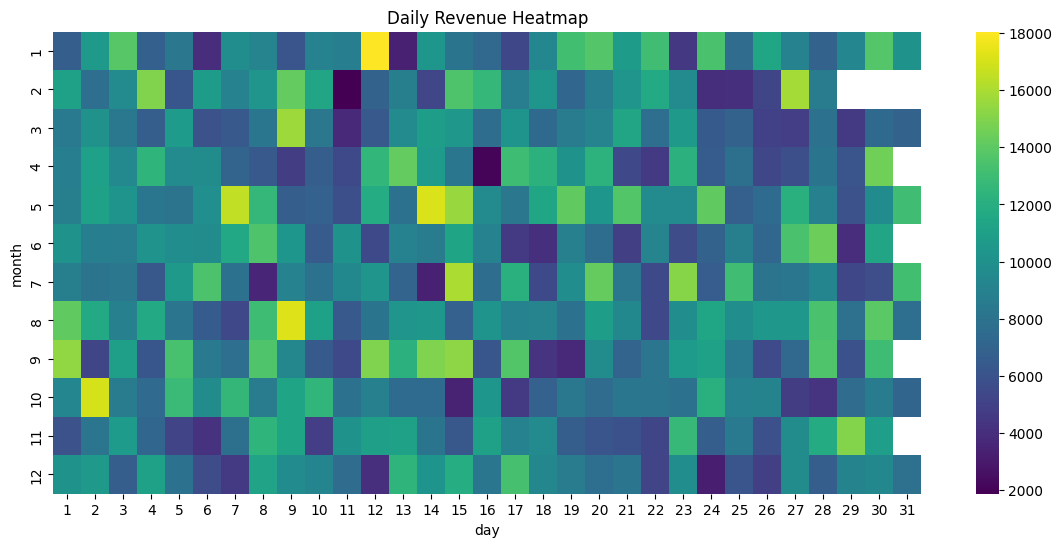

In [23]:

transactions["day"] = transactions["date"].astype('datetime64[ns]').dt.day

pivot = transactions.pivot_table(index="month", columns="day", values="total_amount", aggfunc="sum")

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="viridis")
plt.title("Daily Revenue Heatmap")
plt.show()